In this kernel we will have a look at how to use Decision tree algrithms.It is one of the most popular machine learning algorithm.In this data set we have data of customer.Based on the customer data we have to predict if the customer will buy a product.This kernel is work in process.I will will be updating this in coming days

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/socialnetwork/Social_Network.csv
/kaggle/input/dectree-1/3_class_a.PNG
/kaggle/input/dectree-1/Gini_gain_b.PNG
/kaggle/input/dectree/Splitting_data.PNG
/kaggle/input/dectree/Gini_gain_0.5_c.PNG
/kaggle/input/dectree/Gini_gain_0.5_d.PNG


**Decision Tree**

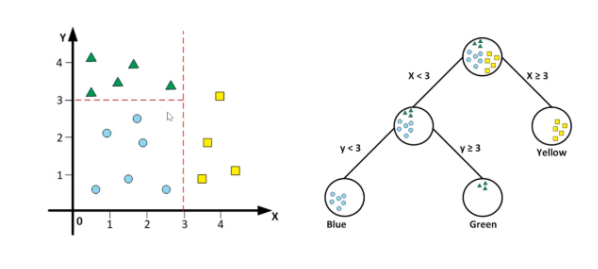

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import numpy as np
img=np.array(Image.open('../input/dectree-1/3_class_a.PNG'))
fig=plt.figure(figsize=(10,10))
plt.imshow(img,interpolation='bilinear')
plt.axis('off')
plt.show()

In decision tree algorithm the data is split into different classes.Splitting the data is done by using the Gini Gain Method.Process for splitting the data using Decision Tree is 

1.Calculate the Gini Gain (called impurity) for the whole data

2.Then we split the data into slits equal to number of data point

3.Then we calculate the Gini Gain for each split

4.Then we calculate (Gini Gain of Whole Data- Gini Gain of each Split) 

5.Highest value of the difference of Gini Gain is selected a the place for first Split


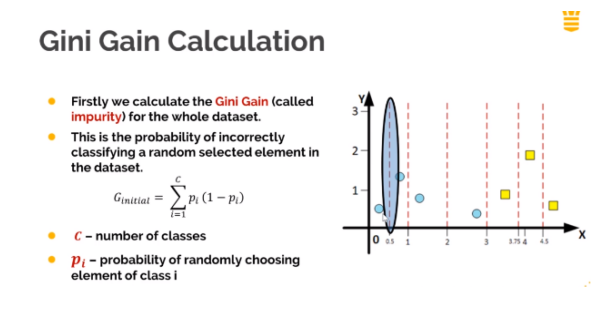

In [3]:
img=np.array(Image.open('../input/dectree-1/Gini_gain_b.PNG'))
fig=plt.figure(figsize=(10,10))
plt.imshow(img,interpolation='bilinear')
plt.axis('off')
plt.show()

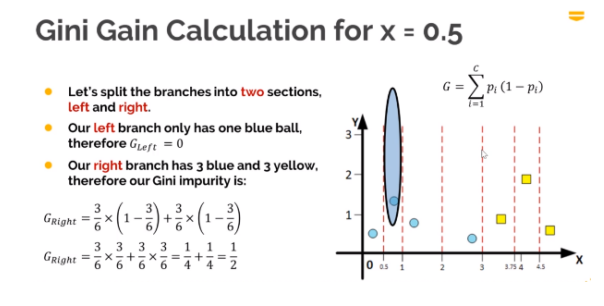

In [4]:
img=np.array(Image.open('../input/dectree/Gini_gain_0.5_c.PNG'))
fig=plt.figure(figsize=(10,10))
plt.imshow(img,interpolation='bilinear')
plt.axis('off')
plt.show()

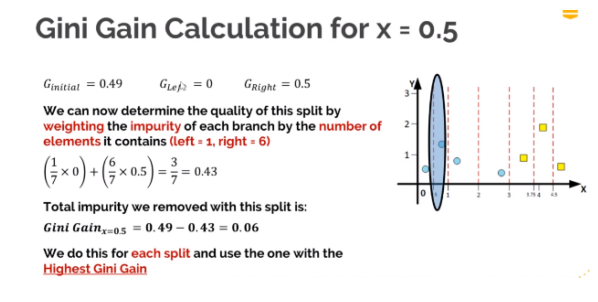

In [5]:
img=np.array(Image.open('../input/dectree/Gini_gain_0.5_d.PNG'))
fig=plt.figure(figsize=(10,10))
plt.imshow(img,interpolation='bilinear')
plt.axis('off')
plt.show()

**Importing Python Modules**

In [6]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import warnings
warnings.filterwarnings('ignore') 

**Importing the dataset**

In [7]:
dataset=pd.read_csv('../input/socialnetwork/Social_Network.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


So we have the User ID, Gender,Age,Salary and the data if Purchase made by a used

3.Generating Array of Features and Target Values

In [8]:
X=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,4].values

**4.Splitting the dataset to Train and Test Set**

In [9]:
from sklearn.model_selection import train_test_split   #cross_validation doesnt work any more
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0) 
#X_train

**5.Feature Scaling**

In [10]:
from sklearn.preprocessing import StandardScaler 
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)
#X_train

**6.Fitting Classifier to Training Set**

In [11]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

**7.Predicting the test result** 

In [12]:
y_pred=classifier.predict(X_test)

**8.Making the confusion Matrix**

In [13]:
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[53,  5],
       [ 1, 21]])

**9.Classification report**

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.95        58
           1       0.81      0.95      0.88        22

    accuracy                           0.93        80
   macro avg       0.89      0.93      0.91        80
weighted avg       0.93      0.93      0.93        80



**10.Visualizing the Training set**

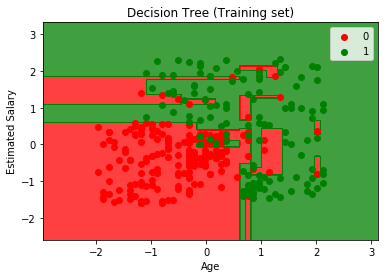

In [15]:
from matplotlib.colors import ListedColormap
X_set,y_set=X_train,y_train
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                 np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
plt.title('Decision Tree (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**11.Visualizing the Test Set**

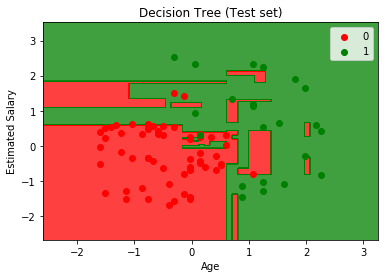

In [16]:
from matplotlib.colors import ListedColormap
X_set,y_set=X_test,y_test
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                 np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
plt.title('Decision Tree (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**12.Extracting Decision tree**

In [17]:
from sklearn.tree import _tree
def find_rules(tree,features):
    dt = tree.tree_
    def visitor(node,depth):
        indent = ' ' * depth
        if dt.feature[node]!=_tree.TREE_UNDEFINED:
            print('()if <{}> <= {}:'.format(indent,features[node],round(dt.threshold[node],2)))
            visitor(dt.children_left[node],depth+1)
            print('{}else:'.format(indent))
            visitor(dt.children_right[node],depth + 1)
        else:
            print('{}return {}'.format(indent,dt.value[node]))
    visitor(0,1)

In [18]:
f=['Age','EstimatedSalary']

In [19]:
#find_rules(classifier,f)